# Homework 6

The National Health and Nutrition Examination Survey (NHANES) is a
cross sectional observational study run every 2-3 years by the
United States Centers for Disease Control (CDC).  It collects
extensive demographic and health-related data on a representative
sample of the US population. We will work with a subset of the possible measures that the NHANES survey collects on basic biometric features.


First we import the libraries that we will be using.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


Now we load the NHANES data from a file.


In [2]:
df = pd.read_csv("./nhanes.csv.gz")

Many biological processes behave differently during development
compared to in adulthood.  For this analysis, we will focus on
people of age 18 or greater (RIDAGEYR contains each subject's age in
years).

In [3]:
df = df.loc[df["RIDAGEYR"] >= 18]

We want to great the gender variable as categorical, so we just indicate that here:

In [4]:
df["RIAGENDR"] = df["RIAGENDR"].replace([1.0, 2.0], ["Male","Female"]).astype("category")

Here are the columns from this data set:

In [5]:
df.columns

Index(['SEQN', 'RIDAGEYR', 'RIAGENDR', 'BMXWT', 'BMXHT', 'BMXBMI', 'BPXSY1',
       'BPXSY2', 'BPXSY3'],
      dtype='object')

## Question 1

### Question 1.1

The `BPXSY1`, `BPXSY2`, and `BXSPY3` columns in the data are repeated systolic blood pressure measurements (the "120" in when your doctor says your blood pressure is "120/80"). Numbers higher than 120 indicate various degrees of "hypertension" (i.e., high blood pressure).

Create a new column `BPXSY`  in the `df` table that is mean of the three measurements for each person (i.e., add the three values together and divide by 3 for each person).


In [6]:
# Calculate mean of BPXSY1, BPXSY2, BPXSY3
df["BPXSY"] = df[["BPXSY1", "BPXSY2", "BPXSY3"]].mean(axis=1)





Plot the marginal distribution of this measurement.

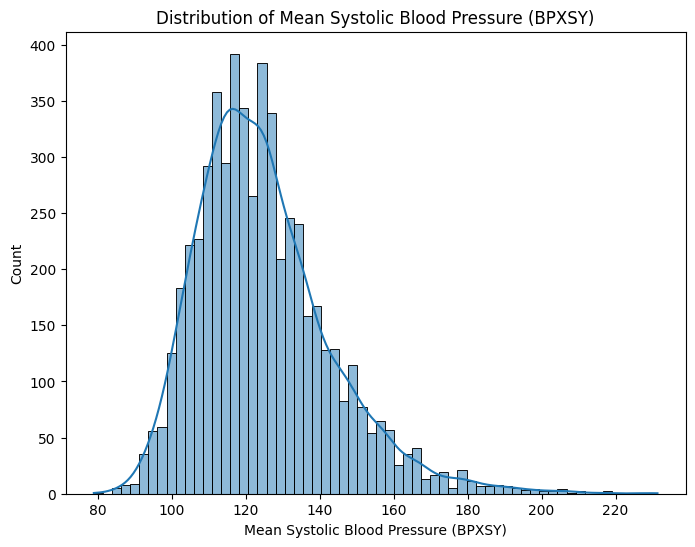

In [7]:
# Plot the marginal distribution
plt.figure(figsize=(8, 6))
sb.histplot(df["BPXSY"].dropna(), kde=True)
plt.xlabel("Mean Systolic Blood Pressure (BPXSY)")
plt.title("Distribution of Mean Systolic Blood Pressure (BPXSY)")
plt.show()

Comment on the **location**, **spread**, and **skew** in this plot. You only need to give broad descriptions (what is a typical value? where are most of the values? is there any skew?).


Location: Values are concentrated from 110 - 130 BPXSY, with a peak around 120 BPXSY.

Spread: The data spreads from 80 to 220 BPXSY, however most values lie within a range of 80 - 160 BPXSY.

Skeew: The distribution has a positive skew.


### Question 1.2

Create a plot that shows two boxplots that show the **conditional distribution** of `BPXSY` for the two genders ("MALE" and "FEMALE") in the `RIAGENDR` column.

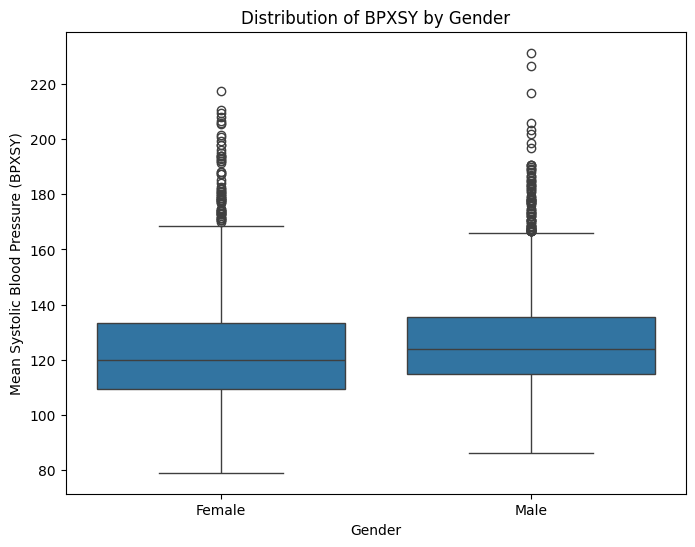

In [8]:
# Plot boxplots for BPXSY by gender
plt.figure(figsize=(8, 6))
sb.boxplot(data=df, x="RIAGENDR", y="BPXSY")
plt.xlabel("Gender")
plt.ylabel("Mean Systolic Blood Pressure (BPXSY)")
plt.title("Distribution of BPXSY by Gender")
plt.show()


Based on this plot, would you say there is much of a difference between men and women on BPXSY? Justify your answer based on both location and spread observed in the plot.


Location: The median values for both "Female" and "Male" lie within eachother's boxplots. This indicates that there is not a large difference between typical BPXSY values between the two genders.

Spread: The IQR between the two genders are similar as well, this suggests that the varaiability in BPXSY is nearly the same for males and females. Both distributions also have similiar upper outliers, which makes them all the more comparable.





### Question 1.3

Calculate the **effect size** of the difference between men and women on BPSXY. As a reminder, you will need to compute the **pooled standard deviation**:

$$S_p = \sqrt{\frac{n_1 S_1^2 + n_2 S_2^2}{n_1 + n_1}}$$

where $S_g^2$ is the variance of group $g$ and $n_g$ is the size of group $g$.

Please note: the class notes suggest using `df.groupby("GROUP").size()` to get the number of units in each group. Because of missing data issues, it turns out this is bad advice. A better strategy is focus on the variable of interest `x = df.groupby("GROUP")["VAR"]` and the `x.count()` to get the size of each group.

In [9]:
# Group data by gender and calculate the mean and variance of BPXSY
# Group data by gender and calculate the mean and variance of BPXSY, with observed=True
bp_group = df.groupby("RIAGENDR", observed=True)["BPXSY"]
mean_bp = bp_group.mean()
var_bp = bp_group.var()
count_bp = bp_group.count()

# Pooled standard deviation calculation
s_p = np.sqrt((count_bp["Male"] * var_bp["Male"] + count_bp["Female"] * var_bp["Female"]) / (count_bp["Male"] + count_bp["Female"]))

# Effect size calculation
effect_size = (mean_bp["Male"] - mean_bp["Female"]) / s_p
print("effect size:", effect_size)




effect size: 0.19354246316051169


Based on the following lists of effect sizes, how would you categorize the difference in BP between men and women?

Effect size magnitude (ignore +/-)
* Very small: 0 - 0.01
* Small: 0.1 - 0.20
* Medium: 0.2 - 	0.50
* Large: 0.5 - 	0.80
* Very large: 0.8 -	1.20
* Huge: 1.2 - 	2.0+


The effect size of .19... falls in the "Small" effect size magnitude, .1 - .2



## Question 2

Let's investigate the relationship between body-mass-index (BMI) and blood pressure.

### Question 2.1

Make a `regplot` of these two measurements with "BMXBMI" on the x-axis. The `marker = '.'` option makes the plot a little cleaner and the `line_kws = {"color": "orange"}` makes the line easier to see.

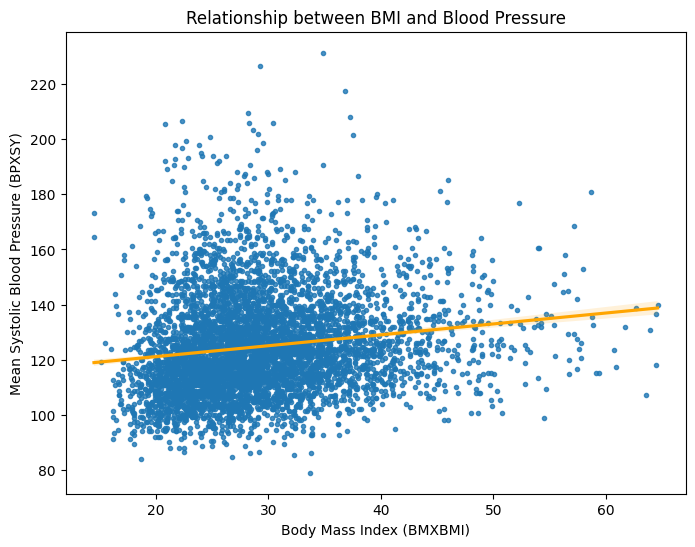

In [10]:
# Scatter plot with regression line for BMI vs BPXSY
plt.figure(figsize=(8, 6))
sb.regplot(data=df, x="BMXBMI", y="BPXSY", marker=".", line_kws={"color": "orange"})
plt.xlabel("Body Mass Index (BMXBMI)")
plt.ylabel("Mean Systolic Blood Pressure (BPXSY)")
plt.title("Relationship between BMI and Blood Pressure")
plt.show()

# You can analyze the direction of the relationship based on the slope of the line.


Given what you see in this plot, how would you categorize the **direction** of the relationship between these variables?



Based on the plot, there is a positive relationship between BMI (Body Mass Index) and systolic blood pressure (BPXSY). The direction seemingly follows lower-left to upper-right. This means that as BMI increases, blood pressure tends to increase as well. However, the relationship appears to be relatively weak, as the slope of the trend line is shallow and the data points are widely dispersed around the line. This suggests that while there is a general tendency for higher BMI values to be associated with higher blood pressure, the relationship is not very strong.



### Question 2.2

To get a better understanding of the relationship for these data compute **Z-scores** for both BMI and BP. Plot them again using a scatter plot (`marker = '.'`), also add vertical and horizontal lines at 0 using

```
plt.axhline(0, color = "black")
plt.axvline(0, color = "black")
```

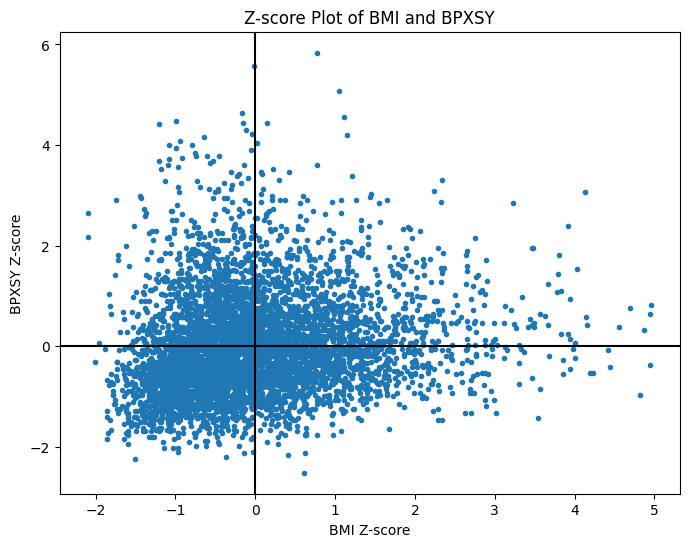

Upper Right: 1181
Upper Left: 1207
Lower Right: 1203
Lower Left: 1923


In [11]:
# Calculate Z-scores
df["BMI_Z"] = (df["BMXBMI"] - df["BMXBMI"].mean()) / df["BMXBMI"].std()
df["BPXSY_Z"] = (df["BPXSY"] - df["BPXSY"].mean()) / df["BPXSY"].std()

# Scatter plot of Z-scores with quadrant lines
plt.figure(figsize=(8, 6))
plt.scatter(df["BMI_Z"], df["BPXSY_Z"], marker='.')
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.xlabel("BMI Z-score")
plt.ylabel("BPXSY Z-score")
plt.title("Z-score Plot of BMI and BPXSY")
plt.show()

upper_right = df[(df["BMI_Z"] > 0) & (df["BPXSY_Z"] > 0)].shape[0]
upper_left = df[(df["BMI_Z"] < 0) & (df["BPXSY_Z"] > 0)].shape[0]
lower_right = df[(df["BMI_Z"] > 0) & (df["BPXSY_Z"] < 0)].shape[0]
lower_left = df[(df["BMI_Z"] < 0) & (df["BPXSY_Z"] < 0)].shape[0]

print("Upper Right:", upper_right)
print("Upper Left:", upper_left)
print("Lower Right:", lower_right)
print("Lower Left:", lower_left)



Based on the number of observations in each quadrant, would you say that that more points are in the upper-left and lower-right or in the upper-left and lower-right quadrants?


Based on the number of observations in each quadrant I would say that there are more points in the lower-left and upper-right quadrants.


### Question 2.3

Calculate the Pearson correlation/correlation coefficient for these two measures. You can use a built in method for DataFrames.

In [12]:
pearson_correlation = df["BMXBMI"].corr(df["BPXSY"])
print("Pearson correlation:", round(pearson_correlation,5))

Pearson correlation: 0.15387


What does this value tell us? Is is consistent with the graphs in the previous two part? Why or why not?


A Pearson correlation coefficient of 0.15387 indicates a weak positive correlation between BMI and systolic blood pressure (BPXSY). This value suggests that as BMI increases, BPXSY tends to increase as well, but the relationship is not strong. This supports what we stated prior.


### Question 2.4

We have observed that both BMI and blood pressure exhibit some right skew. Transform both using reciprocal, square root, and log;  and the compute the correlation matrix for  all combinations of both. For the strongest linear relationship, plot the two transformations and compute the correlation.

Correlation (original): 0.1538707282868578
Correlation (reciprocal): 0.19916980320266256
Correlation (square_root): 0.1671794439339186
Correlation (log): 0.17934062216142013

Strongest correlation is with the 'reciprocal' transformation: 0.19916980320266256


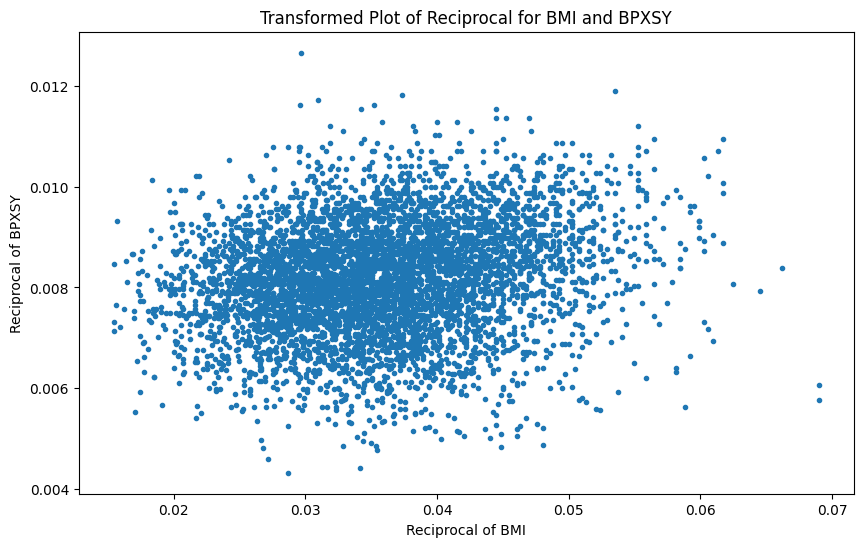

In [13]:
# Original variables for reference
bmi = df["BMXBMI"]
bp = df["BPXSY"]

# Transformations with handling for invalid values
transforms = {
    "original": (bmi, bp),
    "reciprocal": (1 / bmi.replace(0, np.nan), 1 / bp.replace(0, np.nan)),
    "square_root": (np.sqrt(bmi.clip(lower=0)), np.sqrt(bp.clip(lower=0))),
    "log": (np.log(bmi[bmi > 0]), np.log(bp[bp > 0]))
}

# Compute and display correlation matrix
correlation_results = {}
for transform_name, (x_trans, y_trans) in transforms.items():
    # Drop any NaN values that might result from transformations
    valid_indices = x_trans.notna() & y_trans.notna()
    x_trans = x_trans[valid_indices]
    y_trans = y_trans[valid_indices]
    
    # Calculate correlation only on valid indices
    if len(x_trans) > 0 and len(y_trans) > 0:
        corr = np.corrcoef(x_trans, y_trans)[0, 1]
    else:
        corr = np.nan
    correlation_results[transform_name] = corr
    print(f"Correlation ({transform_name}): {corr}")

# Identify the strongest linear relationship, if any non-NaN results exist
if not all(np.isnan(list(correlation_results.values()))):
    strongest_transform = max(correlation_results, key=lambda k: abs(correlation_results[k]) if not np.isnan(correlation_results[k]) else -1)
    print(f"\nStrongest correlation is with the '{strongest_transform}' transformation: {correlation_results[strongest_transform]}")

    # Plotting the strongest transformation pair
    x_trans, y_trans = transforms[strongest_transform]
    valid_indices = x_trans.notna() & y_trans.notna()
    x_trans = x_trans[valid_indices]
    y_trans = y_trans[valid_indices]
    
    plt.figure(figsize=(10, 6))
    plt.scatter(x_trans, y_trans, marker='.')
    plt.title(f"Transformed Plot of {strongest_transform.capitalize()} for BMI and BPXSY")
    plt.xlabel(f"{strongest_transform.capitalize()} of BMI")
    plt.ylabel(f"{strongest_transform.capitalize()} of BPXSY")
    plt.show()
else:
    print("All correlation results are NaN; check data for further issues.")


## Question 3

### Question 3.1

Compute and save into a variable the correlation of `BMXBMI` and `BPXSY`.

Compute and save into variables the means and standard deviations of these variables.

Using these values compute the slope and intercept of the regression line that relates blood pressure and BMI. For this analysis, consider BMI as the "X" variable (sometimes called the independent variable) and blood pressure as the "Y" variable (sometimes called the dependent variable).

In [14]:
# Correlation, mean, and standard deviation
correlation = df["BMXBMI"].corr(df["BPXSY"])
mean_bmi = df["BMXBMI"].mean()
mean_bp = df["BPXSY"].mean()
std_bmi = df["BMXBMI"].std()
std_bp = df["BPXSY"].std()

# Slope and intercept calculation
slope = correlation * (std_bp / std_bmi)
intercept = mean_bp - slope * mean_bmi
slope, intercept

print("slope: ", slope, "intercept:", intercept)


slope:  0.39559343779566414 intercept: 113.26057816640838


### Question 3.2

Using the slope and intercept from the previous part, compute the following:

- The average blood pressure for people with a BMI of 20.
- The average blood pressure for people with a BMI of 30.
- The difference in average blood pressures for people with BMI values of 18 and BMI values of 21.

In [15]:
# Predict BP for BMI values of 20, 30, and difference for 18 and 21
bp_20 = slope * 20 + intercept
bp_30 = slope * 30 + intercept
bp_diff_18_21 = (slope * 21 + intercept) - (slope * 18 + intercept)

print("avg 20: ", bp_20, "avg 30: ", bp_30, "diff of avg: ",bp_diff_18_21 )

avg 20:  121.17244692232165 avg 30:  125.1283813002783 diff of avg:  1.1867803133869899


### Question 3.2

Create a scatter plot of the data with the regression line overlayed. Do not use the `regplot` or `lmplot` functions. You may use `plt.axline` to add the regression line.


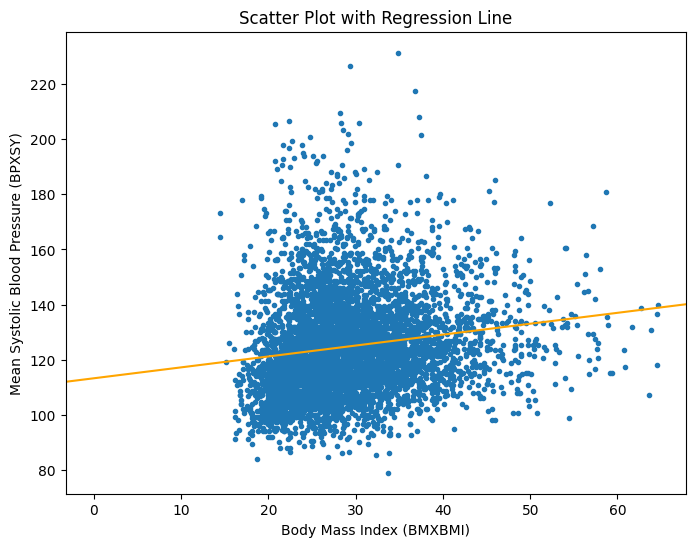

In [16]:
# Scatter plot with regression line
plt.figure(figsize=(8, 6))
plt.scatter(df["BMXBMI"], df["BPXSY"], marker='.')
plt.axline((0, intercept), slope=slope, color="orange")
plt.xlabel("Body Mass Index (BMXBMI)")
plt.ylabel("Mean Systolic Blood Pressure (BPXSY)")
plt.title("Scatter Plot with Regression Line")
plt.show()





### Question 3.3

Use the `statsmodels` library to fit a linear regression model to the data using the `sm.OLS` function. Print the summary of the model and verify that your calculations from the previous parts are correct.

In [17]:
from statsmodels import api as sm
# Fit regression model using statsmodels
# First, drop rows with NaN values in either BMXBMI or BPXSY
df_clean = df.dropna(subset=["BMXBMI", "BPXSY"])

# Now, drop rows with infinite values in either BMXBMI or BPXSY
df_clean = df_clean[~np.isinf(df_clean["BMXBMI"])]
df_clean = df_clean[~np.isinf(df_clean["BPXSY"])]

# Prepare your independent variable (X) again using the cleaned DataFrame
X = sm.add_constant(df_clean["BMXBMI"])  # Adds intercept term

# Fit the regression model using statsmodels
model = sm.OLS(df_clean["BPXSY"], X).fit()

# Print the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  BPXSY   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     133.7
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           1.45e-30
Time:                        20:47:54   Log-Likelihood:                -23736.
No. Observations:                5514   AIC:                         4.748e+04
Df Residuals:                    5512   BIC:                         4.749e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        113.2033      1.034    109.487      0.0

Yes, the slopes and y interecept are extremely close in value, which verifies what we calculated prior
